# Récupération des données

In [1407]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Activation, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adamax

%matplotlib inline
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)

In [624]:
Y_train = numpy.load('Y_train.npy')

In [625]:
X_train = numpy.load('X_train.npy')

## Train / Val Split

In [626]:
X_train, x_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=15)

In [627]:
print(X_train.shape)
print(Y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1649, 64, 64)
(1649, 10)
(413, 64, 64)
(413, 10)


## Remise en forme des données

In [628]:
print(X_train.shape)
print(Y_train.shape)

(1649, 64, 64)
(1649, 10)


In [629]:
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
x_val_flat = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2])
X_train_flat.shape

(1649, 4096)

In [630]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Modèle NN

In [631]:
input_number = X_train_flat.shape[1]
output_number = 10
print('input nmuber = ', input_number)
print('output_number = ', output_number)

input nmuber =  4096
output_number =  10


In [632]:
model = Sequential()
model.add(Dense(input_number, activation='relu'))
model.add(Dense(output_number, activation='softmax'))

In [633]:
loss = 'mse'

LEARNING_RATE = 0.05
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE),
              metrics=['accuracy'])

EPOCHS = 20 # how many iterations over the whole dataset
history = model.fit(X_train_flat, Y_train, epochs=EPOCHS, batch_size=input_number)

Epoch 1/20
1649/1649 [==============================] - 1s 388us/step - loss: 0.0923 - accuracy: 0.0976
Epoch 2/20
1649/1649 [==============================] - 1s 359us/step - loss: 0.0911 - accuracy: 0.0873
Epoch 3/20
1649/1649 [==============================] - 1s 332us/step - loss: 0.0907 - accuracy: 0.0891
Epoch 4/20
1649/1649 [==============================] - 1s 340us/step - loss: 0.0904 - accuracy: 0.0885
Epoch 5/20
1649/1649 [==============================] - 1s 338us/step - loss: 0.0902 - accuracy: 0.0867
Epoch 6/20
1649/1649 [==============================] - 1s 339us/step - loss: 0.0901 - accuracy: 0.0885
Epoch 7/20
1649/1649 [==============================] - 1s 339us/step - loss: 0.0900 - accuracy: 0.0982
Epoch 8/20
1649/1649 [==============================] - 1s 336us/step - loss: 0.0899 - accuracy: 0.1140
Epoch 9/20
1649/1649 [==============================] - 1s 346us/step - loss: 0.0898 - accuracy: 0.1207
Epoch 10/20
1649/1649 [==============================] - 1s 343u

In [634]:
model.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 4096)              16781312  
_________________________________________________________________
dense_103 (Dense)            (None, 10)                40970     
Total params: 16,822,282
Trainable params: 16,822,282
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epoch')

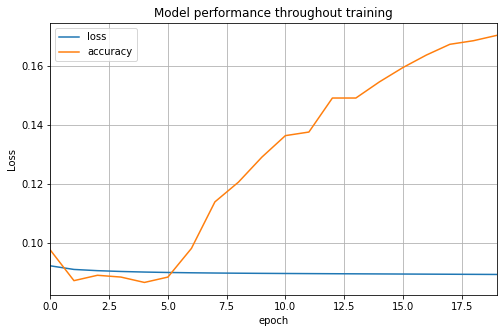

In [635]:
import pandas as pd
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
#plt.ylim(bottom = history.history['loss'][-1], top = history.history['loss'][5]);

In [636]:
score = model.evaluate(x_val_flat, y_val, verbose=0)
score

[0.0894293470835859, 0.17917676270008087]

In [637]:
y_predict = model.predict(x_val_flat)

In [638]:
y_predict[0]

array([0.09797926, 0.08654831, 0.11042213, 0.09068429, 0.09595544,
       0.10238077, 0.09064502, 0.10089137, 0.10615899, 0.11833448],
      dtype=float32)

In [639]:
y_predict = pandas.DataFrame(y_predict)
y_predict.columns = ['0','1','2','3','4','5','6','7','8','9']
y_predict.head()

,0,1,2,3,4,5,6,7,8,9
0,0.098,0.087,0.110,0.091,0.096,0.102,0.091,0.101,0.106,0.118
1,0.116,0.105,0.111,0.095,0.100,0.091,0.089,0.099,0.089,0.106
2,0.118,0.085,0.088,0.085,0.143,0.102,0.090,0.102,0.089,0.096
3,0.088,0.103,0.110,0.092,0.089,0.103,0.111,0.105,0.100,0.101
4,0.108,0.094,0.111,0.085,0.119,0.083,0.130,0.090,0.093,0.089


In [640]:
for i in range(0, 10):
    y_predict.loc[y_predict[str(i)] == y_predict.agg(func=max, axis=1), str(i)] = 1
    y_predict.loc[y_predict[str(i)] < 1, str(i)] = 0

y_predict.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [641]:
y_val_mod = pandas.DataFrame(y_val)
y_val_mod.columns = ['0','1','2','3','4','5','6','7','8','9']
y_val_mod.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [642]:
y_val_mod = numpy.array(y_val)
y_predict = numpy.array(y_predict)

In [643]:
def Y_transform(Y_train):
    Y_output = []
    for line in range(len(Y_train)):
        for col in range(10):
            value = str(int(Y_train[line][col]))
            if value == '1':
                Y_output += [str(col)]

    return Y_output

In [644]:
y_val_flat = Y_transform(y_val_mod)
y_predict_flat = Y_transform(y_predict)

[[ 3  3  0  3  0  3  0  1  2  5]
 [ 3 24  8  9  8 12  8  8  4  6]
 [ 5  5  4  1  0  1  5  2  1  7]
 [ 2  0  3  5  2  3  0  3  4  0]
 [ 6  6 11 13 23  7  5 20 20  5]
 [ 1  2  1  2  0  0  1  1  2  2]
 [ 8  0  9  8  5 17 12  4  6  9]
 [ 0  4  0  1  0  0  1  0  1  0]
 [ 3  1  0  3  3  0  0  4  2  2]
 [ 2  1  1  4  1  1  1  3  4  1]]


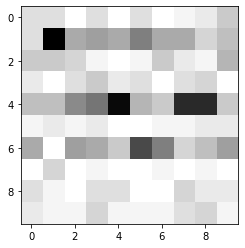

In [645]:
conf_matrix = metrics.confusion_matrix(y_predict_flat, y_val_flat)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

# Modèle CNN

In [646]:
input_number = (X_train.shape[1], X_train.shape[2])
output_number = 10
print('input nmuber = ', input_number)
print('output_number = ', output_number)

input nmuber =  (64, 64)
output_number =  10


In [647]:
X_train = numpy.expand_dims(X_train, axis=X_train.ndim)
x_val = numpy.expand_dims(x_val, axis=x_val.ndim)
X_train.shape

(1649, 64, 64, 1)

In [1408]:
model2 = Sequential()
model2.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(12, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

callbacks = [EarlyStopping(monitor='val_accuracy', patience=10)]

loss = 'categorical_crossentropy'
LEARNING_RATE = 0.02
EPOCHS = 1000

model2.compile(loss=loss,
               optimizer=Adamax(lr=LEARNING_RATE), # SGD(lr=LEARNING_RATE)
               metrics=['accuracy'])

history = model2.fit(X_train,
                     Y_train,
                     epochs=EPOCHS,
                     validation_data=(x_val, y_val),
                     batch_size=X_train.shape[0],
                     callbacks=callbacks)

Train on 1649 samples, validate on 413 samples
Epoch 1/1000
1649/1649 [==============================] - 1s 657us/step - loss: 2.3121 - accuracy: 0.0703 - val_loss: 2.3718 - val_accuracy: 0.0920
Epoch 2/1000
1649/1649 [==============================] - 1s 562us/step - loss: 2.3373 - accuracy: 0.1176 - val_loss: 2.2898 - val_accuracy: 0.1646
Epoch 3/1000
1649/1649 [==============================] - 1s 540us/step - loss: 2.2862 - accuracy: 0.1874 - val_loss: 2.2849 - val_accuracy: 0.1574
Epoch 4/1000
1649/1649 [==============================] - 1s 558us/step - loss: 2.2857 - accuracy: 0.1583 - val_loss: 2.2770 - val_accuracy: 0.1961
Epoch 5/1000
1649/1649 [==============================] - 1s 573us/step - loss: 2.2765 - accuracy: 0.1959 - val_loss: 2.2594 - val_accuracy: 0.3390
Epoch 6/1000
1649/1649 [==============================] - 1s 563us/step - loss: 2.2558 - accuracy: 0.3517 - val_loss: 2.2302 - val_accuracy: 0.3002
Epoch 7/1000
1649/1649 [==============================] - 1s 554u

Epoch 56/1000
1649/1649 [==============================] - 1s 561us/step - loss: 0.2975 - accuracy: 0.9145 - val_loss: 0.4243 - val_accuracy: 0.8741
Epoch 57/1000
1649/1649 [==============================] - 1s 554us/step - loss: 0.2866 - accuracy: 0.9175 - val_loss: 0.4195 - val_accuracy: 0.8765
Epoch 58/1000
1649/1649 [==============================] - 1s 584us/step - loss: 0.2762 - accuracy: 0.9218 - val_loss: 0.4154 - val_accuracy: 0.8789
Epoch 59/1000
1649/1649 [==============================] - 1s 567us/step - loss: 0.2659 - accuracy: 0.9272 - val_loss: 0.4107 - val_accuracy: 0.8765
Epoch 60/1000
1649/1649 [==============================] - 1s 576us/step - loss: 0.2562 - accuracy: 0.9315 - val_loss: 0.4053 - val_accuracy: 0.8814
Epoch 61/1000
1649/1649 [==============================] - 1s 580us/step - loss: 0.2467 - accuracy: 0.9339 - val_loss: 0.4007 - val_accuracy: 0.8765
Epoch 62/1000
1649/1649 [==============================] - 1s 587us/step - loss: 0.2392 - accuracy: 0.9345

In [1409]:
score = model2.evaluate(x_val, y_val, verbose=0)
score

[0.37059716086555045, 0.9007263779640198]

In [1410]:
model2.summary()

Model: "sequential_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 62, 62, 6)         60        
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 29, 29, 12)        660       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 12, 12, 24)        2616      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 6, 24)          0         
_________________________________________________________________
flatten_83 (Flatten)         (None, 864)            

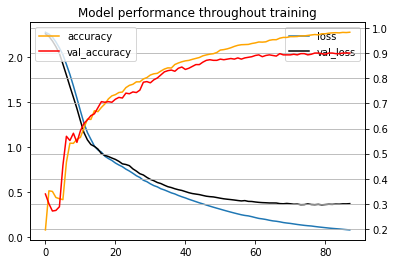

In [1411]:
import pandas as pd
%matplotlib inline

fig, ax1 = plt.subplots()

plt.plot(history.history['loss'][4:], label='loss')
plt.plot(history.history['val_loss'][4:], c = 'black', label='val_loss')
plt.legend()

ax2 = ax1.twinx()
plt.plot(history.history['accuracy'][4:], c = 'orange', label='accuracy')
plt.plot(history.history['val_accuracy'][4:], c = 'red', label='val_accuracy')
plt.legend()

plt.grid(True)
plt.title('Model performance throughout training')
plt.xlabel('epoch');

In [1412]:
y_predict = model2.predict(x_val)

In [1413]:
y_predict[0]

array([4.4789235e-14, 1.1340146e-17, 6.2410060e-10, 9.9998307e-01,
       3.8632554e-17, 3.2045866e-12, 1.2348252e-05, 3.6938055e-09,
       4.5037632e-06, 2.7907301e-10], dtype=float32)

In [1414]:
y_predict = pandas.DataFrame(y_predict)
y_predict.columns = ['0','1','2','3','4','5','6','7','8','9']
y_predict.head()

,0,1,2,3,4,5,6,7,8,9
0,4.479e-14,1.134e-17,6.241e-10,1.000e+00,3.863e-17,3.205e-12,1.235e-05,3.694e-09,4.504e-06,2.791e-10
1,8.151e-01,3.021e-07,1.846e-03,3.681e-05,7.667e-09,1.825e-01,5.098e-04,5.869e-06,2.926e-05,3.024e-06
2,1.773e-09,8.621e-11,5.559e-04,2.487e-01,8.847e-09,8.179e-07,2.271e-05,5.226e-04,7.502e-01,4.387e-10
3,6.543e-07,2.895e-09,5.482e-04,1.252e-05,9.653e-01,1.315e-06,3.366e-06,6.782e-04,3.343e-02,2.977e-07
4,7.799e-08,2.423e-13,5.999e-02,6.947e-10,4.921e-15,9.995e-06,6.740e-06,2.143e-04,1.376e-12,9.398e-01


In [1415]:
for i in range(0, 10):
    y_predict.loc[y_predict[str(i)] == y_predict.agg(func=max, axis=1), str(i)] = 1
    y_predict.loc[y_predict[str(i)] < 1, str(i)] = 0

y_predict.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1416]:
y_val_mod = pandas.DataFrame(y_val)
y_val_mod.columns = ['0','1','2','3','4','5','6','7','8','9']
y_val_mod.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1417]:
y_val_mod = numpy.array(y_val_mod)
y_predict = numpy.array(y_predict)

In [1418]:
def Y_transform(Y_train):
    Y_output = []
    for line in range(len(Y_train)):
        for col in range(10):
            value = str(int(Y_train[line][col]))
            if value == '1':
                Y_output += [str(col)]

    return Y_output

In [1419]:
y_val_mod = Y_transform(y_val_mod)
y_predict = Y_transform(y_predict)

[[30  0  0  0  0  4  0  0  0  1]
 [ 0 45  0  1  0  0  0  0  0  0]
 [ 0  0 32  2  0  0  3  0  2  0]
 [ 0  0  0 42  0  0  3  0  3  0]
 [ 1  0  0  0 40  0  0  0  0  0]
 [ 0  0  1  0  2 40  0  0  0  0]
 [ 1  1  3  2  0  0 27  0  0  2]
 [ 0  0  0  0  0  0  0 42  1  0]
 [ 0  0  1  2  0  0  0  3 40  0]
 [ 1  0  0  0  0  0  0  1  0 34]]


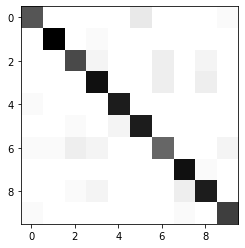

In [1420]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val_mod)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');